# EE214 Assignment 2: Task 1 - Clustering Algorithms

This notebook implements a clustering pipeline on the UCI Dermatology dataset (~358 samples, 34 features) using unsupervised‑learning techniques. It covers data loading, preprocessing (scaling and PCA), clustering (K‑Means and DBSCAN), and evaluation using Elbow method, with visualizations after the clustering step.

In [26]:
!pip install ucimlrepo #This installs the UCIML library to import the dataset

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from ucimlrepo import fetch_ucirepo

from sklearn.preprocessing import LabelEncoder


## Data Loading

Load the complete UCI Dermatology dataset (358 patient records, 34 numeric attributes). Only the feature matrix X_train is used for clustering; the original diagnosis labels are kept aside for optional reference or plotting but are not used in any algorithm training.

In [28]:
dataset = fetch_ucirepo(id=33) # Dermatolegy Dataset with 6 classes


# Access the data
X = dataset.data.features
y = dataset.data.targets

# Example usage (replace with your desired processing):
# Split data into training and testing sets
X_train, X_test, T_train, T_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for and remove NaN values
X_train = X_train.dropna()
T_train = T_train.loc[X_train.index]

X_test = X_test.dropna()
T_test = T_test.loc[X_test.index]  # Keep target values aligned with features

# Print the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", T_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", T_test.shape)


X_train shape: (287, 34)
y_train shape: (287, 1)
X_test shape: (71, 34)
y_test shape: (71, 1)


In [29]:
X_train #Dataset information and samples

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age
341,1,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,68.0
202,2,2,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3,0,52.0
75,3,2,1,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,25.0
84,1,1,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,55.0
354,2,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2,1,2,0,0,0,3,0,3,0,...,0,0,0,0,0,3,3,0,0,13.0
106,1,1,0,1,1,0,0,0,0,0,...,0,0,0,2,0,0,0,2,0,60.0
270,2,2,1,0,1,0,0,0,0,0,...,0,1,0,3,0,0,0,2,0,62.0
348,3,2,2,0,0,0,3,0,1,0,...,0,0,0,2,0,3,2,2,0,10.0


In [30]:
T_train #See class information

,class
341,5
202,5
75,2
84,5
354,5
...,...
71,6
106,4
270,4
348,6


## Preprocessing

Apply PCA to reduce dimensionality and scale the data using Standard scalers.

In [31]:
# Standard Scaling
# Scale X_train to zero mean and unit variance using StandardScaler
standard_scaler = StandardScaler()
X_train_s = standard_scaler.fit_transform(X_train)


Explained variance ratio: 0.6359814405595647
PCA output shape: (287, 5)


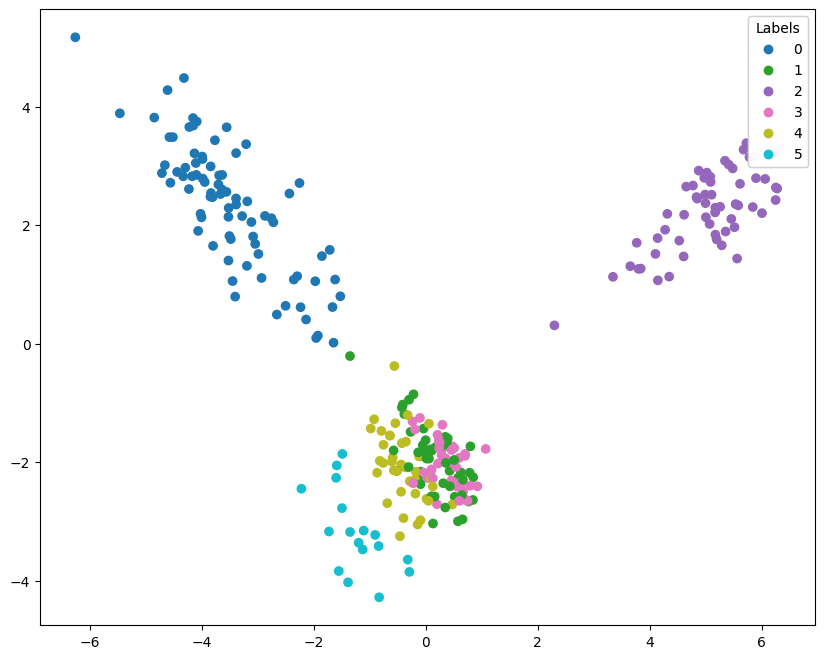

In [32]:
pca = PCA(n_components=5, random_state=42) # You can adjust n_components as needed
X_train_pca = pca.fit_transform(X_train_s)
print("Explained variance ratio:", pca.explained_variance_ratio_.sum())
# Verify PCA output shape
print('PCA output shape:', X_train_pca.shape)

# Visualization
color_num = 3
plt.rcParams['figure.figsize'] = [10, 8]
xs = X_train_pca[:,0]
ys = X_train_pca[:,1]

# Assuming T_train is a DataFrame and 'class' is the column with labels
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(T_train['class'])

scatter = plt.scatter(xs, ys, c=numerical_labels, cmap='tab10')

legend1 = plt.legend(*scatter.legend_elements(), loc="upper right", title="Labels")
plt.gca().add_artist(legend1) # Add the legend to the plot

plt.show()

## Visualization Functions

Define functions for visualizing clustering results (image plots, t-SNE, PCA scatter plots).

In [33]:
# t-SNE Visualization (for reference)
def vec_vis(x, y, T, n, title): #Note that we make two plots here where the later original plot using actual labels.
    plt.rcParams['figure.figsize'] = [20, 8]
    color_num = max(n, 5)
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    xs = x[:, 0]
    ys = x[:, 1]
    ax1.set_title('t-SNE Visualization with Clustering')
    scatter = ax1.scatter(xs, ys, c=y, cmap=plt.get_cmap('rainbow', color_num))
    legend = ax1.legend(*scatter.legend_elements(), loc='upper right', title='Clusters')
    ax2.set_title('t-SNE Visualization with True Labels')
    scatter = ax2.scatter(xs, ys, c=T, cmap=plt.get_cmap('rainbow', color_num))
    legend = ax2.legend(*scatter.legend_elements(), loc='upper right', title='Labels')
    plt.suptitle(title)
    plt.show()

In [35]:
# PCA Scatter Plot
def pca_scatter_plot(X_pca, Y, T, title):
    plt.figure(figsize=(10, 5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='rainbow', alpha=0.5)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

define and fit model for t-SNE visualization

In [36]:
# Compute t-SNE for visualization (takes 2–3 minutes)
model = TSNE(learning_rate=300, random_state=3)
TSNE_X = model.fit_transform(X_train_pca)

## Clustering- Implementing KMeans algorithm

In [53]:
class KMeans:

  def __init__(self, n_clusters=1, random_state=500):
      '''
      parameter:
      n_clusters: desired number of clusters
      random_state: random state for initializing the centroids
      '''
      assert n_clusters >= 1
      self.n_clusters = n_clusters
      self.random_state = random_state
      self.cluster_centers_ = None    # cluster centers (=centriods) will be initialized in 'fit' method
      self.inertia_ = None            # SSE, set in 'fit' method

  def fit(self, X):
      '''
      parameter:
      X: data
      shape of X: (number of sample, feature dimensions)

      Compute the centroids that can achieve the minimum variance within clusters given a (training) data X.
      Clustering is performed iteratively until the centroids are not changed, i.e., until the optimum is reached.
      The centroids obtained here; "self.cluster_centers_" will be used in "predict" method.

      It returns a array of cluster labels for data X.
      For each sample in X, the cluster label means the index of the nearest center among centers in self.cluster_centers_. Thus, the cluster labels range from 0 to (n_clusters-1).

      Return:
      cluster_labels: numpy array of cluster labels for all data samples in X
      '''

      # convert to ndarray in case a DataFrame is passed
      X = np.asarray(X, dtype=float)

      # Here, the centroids is initialized with arbitrary samples of X.
      np.random.seed(self.random_state)  # the choice of these random samples is governed by the "self.random_state".
      initial_cluster_centers_idx = np.random.choice(len(X), self.n_clusters, replace=False) # choose the 'n_clusters' number of samples in X to take them as initial centriods
      self.cluster_centers_ = X[initial_cluster_centers_idx]  # initial centroids


      # fill in the blank --------------------------------------
      cluster_labels = None
      while True:
        # 1. Assign each sample to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.cluster_centers_, axis=2)  # shape: (n_samples, n_clusters)
        cluster_labels_tmp = np.argmin(distances, axis=1)  # shape: (n_samples,)

        # 2. Compute new centroids
        new_centers = np.array([X[cluster_labels_tmp == i].mean(axis=0) if np.any(cluster_labels_tmp == i) else self.cluster_centers_[i]
                                for i in range(self.n_clusters)])

        # 3. Check for convergence (if centers didn't change)
        if np.array_equal(cluster_labels, cluster_labels_tmp):
           break
        else:
           cluster_labels = cluster_labels_tmp
           self.cluster_centers_ = new_centers
    #   max_iter = 300
    #   for _ in range(max_iter):
    #     # 1. Assign each sample to the nearest centroid
    #     distances = np.linalg.norm(X[:, np.newaxis] - self.cluster_centers_, axis=2)  # shape: (n_samples, n_clusters)
    #     cluster_labels = np.argmin(distances, axis=1)  # shape: (n_samples,)

    #     # 2. Compute new centroids
    #     new_centers = np.array([X[cluster_labels == i].mean(axis=0) if np.any(cluster_labels == i) else self.cluster_centers_[i]
    #                              for i in range(self.n_clusters)])

    #     # 3. Check for convergence (if centers didn't change)
    #     if np.allclose(self.cluster_centers_, new_centers):
    #         break

    #     self.cluster_centers_ = new_centers
      # --------------------------------------------------------

      # compute inertia (sum of squared distances to closest centroid)
      sq_dists = np.sum((X - self.cluster_centers_[cluster_labels])**2, axis=1)
      self.inertia_ = sq_dists.sum()

      return cluster_labels


  def predict(self, X):
      '''
      parameter:
      X: data
      shape of X: (number of sample, feature dimensions)

      For each sample in the data X (might be testset), predict the cluster using the centroids obtained from "fit" method.
      It returns an array of cluster labels for data X.

      Return:
      cluster_labels: numpy array of cluster labels for all data samples in X (testset)
      '''
      assert self.cluster_centers_ is not None

      # fill in the blank --------------------------------------
      # Compute distances from each sample to each centroid
      distances = np.linalg.norm(X[:, np.newaxis] - self.cluster_centers_, axis=2)  # shape: (n_samples, n_clusters)

      # Assign each sample to the nearest centroid
      cluster_labels = np.argmin(distances, axis=1)  # shape: (n_samples,)
      # --------------------------------------------------------

      return cluster_labels

Apply K-Means for n clusters, followed by visualization.

In [ ]:
# convert to ndarray in case a DataFrame is passed
X = np.asarray(X_train_pca, dtype=float)
cluster_centers_ = None
n_clusters = 6

# Here, the centroids is initialized with arbitrary samples of X.
np.random.seed(500)  # the choice of these random samples is governed by the "self.random_state".
initial_cluster_centers_idx = np.random.choice(len(X), n_clusters, replace=False) # choose the 'n_clusters' number of samples in X to take them as initial centriods
cluster_centers_ = X[initial_cluster_centers_idx]  # initial centroids

print(X[1, ...])
print(cluster_centers_)
print((X[:, np.newaxis] - cluster_centers_)[1, ...])
# fill in the blank --------------------------------------
max_iter = 300
for _ in range(max_iter):
    # 1. Assign each sample to the nearest centroid
    distances = np.linalg.norm(X[:, np.newaxis] - cluster_centers_, axis=2)  # shape: (n_samples, n_clusters)
    cluster_labels = np.argmin(distances, axis=1)  # shape: (n_samples,)

    # 2. Compute new centroids
    new_centers = np.array([X[cluster_labels == i].mean(axis=0) if np.any(cluster_labels == i) else cluster_centers_[i]
                        for i in range(n_clusters)])

    # 3. Check for convergence (if centers didn't change)
    if np.allclose(cluster_centers_, new_centers):
        break

cluster_centers_ = new_centers
# --------------------------------------------------------

[-0.36525043 -2.08962188 -1.15576005  1.9911482   0.93993463]
[[ 0.57347047 -2.26935595 -1.35692877 -1.44766864  1.19462296]
 [ 0.74540699 -2.65382563 -0.47936689 -0.82863122 -1.17111652]
 [-0.86921652 -2.18008238 -2.40514793  3.43404949  0.02227164]
 [ 5.45917102  2.10372314 -0.03378517  0.63256103 -0.17504095]
 [-3.52559479  1.4017882  -0.17698757  0.84551192 -1.21083288]
 [-5.46587084  3.88619417  0.91067216 -1.47928616  1.44779752]]
[[-0.9387209   0.17973407  0.20116872  3.43881684 -0.25468833]
 [-1.11065742  0.56420375 -0.67639316  2.81977942  2.11105115]
 [ 0.50396609  0.0904605   1.24938788 -1.44290129  0.91766299]
 [-5.82442145 -4.19334502 -1.12197488  1.35858717  1.11497557]
 [ 3.16034436 -3.49141008 -0.97877248  1.14563628  2.15076751]
 [ 5.10062041 -5.97581604 -2.06643221  3.47043436 -0.5078629 ]]


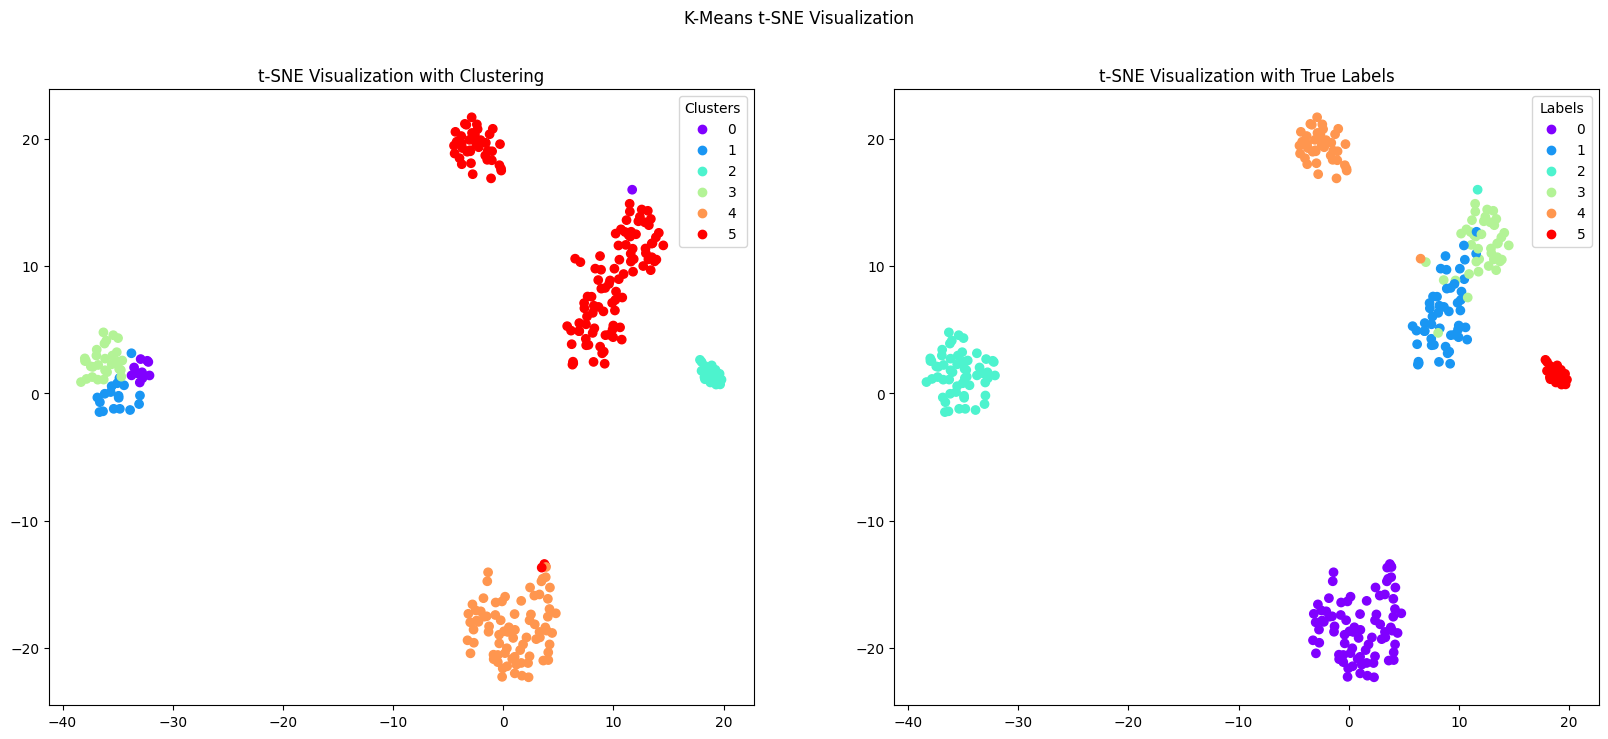

In [ ]:
# K-Means Clustering
k = 6 # number of clusters

# Cluster X_train_pca into n clusters
kmeans = KMeans(n_clusters=k, random_state=42)
Y_train_kmeans = kmeans.fit(X_train_pca)

# K-Means Visualizations
#img_plt(X_train, Y_train_kmeans, 'K-Means Clustering')
vec_vis(TSNE_X, Y_train_kmeans, numerical_labels, 6, 'K-Means t-SNE Visualization')

## Determining number of Clusters

 Determining the number of clusters is a critical step in unsupervised learning, as it directly impacts the quality of clustering results. For K-Means, the Elbow method and Silhouette score are commonly used, where the Elbow method identifies the point where adding more clusters yields diminishing reductions in within-cluster sum-of-squares (inertia), and the Silhouette score measures cluster cohesion and separation. For Agglomerative Clustering, similar metrics like the Silhouette score can be applied across a range of cluster numbers, or dendrograms can be analyzed to identify natural cluster splits, though computational constraints may limit dendrogram use for large datasets. For DBSCAN, which does not require a predefined number of clusters, the optimal `eps` and `min_samples` can be tuned by evaluating the number of clusters and noise points produced, often using a k-distance plot to estimate a suitable `eps` value based on the distance to the k-th nearest neighbor.

Evaluate K-Means clustering using the Elbow method for k=2 to 10.

Inertia list length: 8


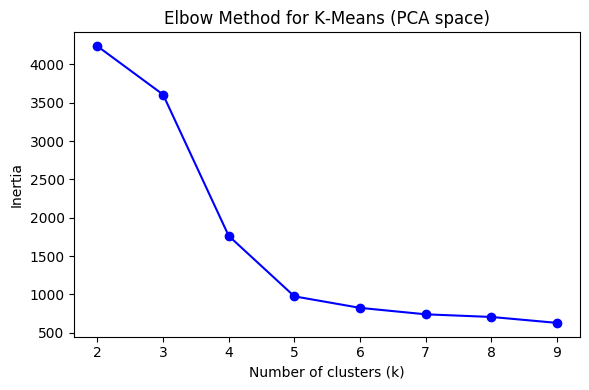

In [55]:
# K-Means: Elbow Method
# Compute inertia for k=2 to 10
inertia_list = []

k_range = range(2, 10)
for k in k_range:
    model = KMeans(n_clusters=k, random_state=1)
    labels = model.fit(X_train_pca)
    inertia_list.append(model.inertia_)

# Verify lists length
print('Inertia list length:', len(inertia_list))

# Plot Elbow
plt.figure(figsize=(6,4))
plt.plot(k_range, inertia_list, "bo-")
plt.title("Elbow Method for K‑Means (PCA space)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.tight_layout(); plt.show()

## Clustering- Implementing DBSCAN algorithm

In [ ]:
class DBSCAN:

    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples

    def fit_predict(self, X):
        '''
        parameter:
        X: data
        shape of X: (number of sample, feature dimensions)

        It returns a array of cluster labels for each sample point.
        Here, the cluster labels are numbered starting from 1.
        Moreover, "-1" means noise.
        '''
        self.X = X
        self.cluster_labels = np.zeros((len(X)))              # Initialize all the cluster labels as 0
        self.current_label = 0
        self.labeled_indices = set()                          # for tracking all visited(already labeled) points
        self.core_sample_indices_ = []                        # for tracking all core samples (for future visualization)

        # declare something if you think you need ------------

        # ----------------------------------------------------

        while np.any(self.cluster_labels == 0):               # repeat until there's no point that has not been visited any more
            p_idx = self.pick_arbitrary_point()               # pick arbitrary point among points that are not visited so far (fill the blanks for "pick_arbitrary_point" below)
            if self.is_core_sample(p_idx):                    # check if it is core sample (fill the blanks for "is_core_sample" below)
                self.current_label += 1                       # define new cluster label for current visiting
                self.visit_all_successive_neighbors(p_idx)    # visit all the neighbors and label them in succession (fill the blanks for "visit_all_successive_neighbors" below)
            else:
                self.cluster_labels[p_idx] = -1               # label it as noise if it is not a core sample in the first place

        return self.cluster_labels

    def pick_arbitrary_point(self):
        '''
        Pick arbitrary point among points that are not visited so far (for next successive visiting).
        It returns an "index" of point("p_idx"), not a data point itself.
        '''
        # fill in the blank --------------------------------------
        unvisited_idx = np.where(self.cluster_labels == 0)[0]
        p_idx = np.random.choice(unvisited_idx)
        # --------------------------------------------------------
        assert self.cluster_labels[p_idx] == 0                # for sanity check
        return p_idx

    def is_core_sample(self, p_idx):
        '''
        parameter:
        p_idx: index of point

        Check whether the "p_idx" is a core sample or not.
        If it is, return True. Otherwise, return False.
        You can use "get_neighbors" method, which is defined below.
        You can define a core sample that has greater than or equal to min_samples points in its neighbor, where the point itself is also included in its neighbor.
        '''
        # fill in the blank --------------------------------------
        neighbors = self.get_neighbors(p_idx)
        num_neighbors = len(neighbors)

        if num_neighbors >= self.min_samples:
            return True
        else:
            return False
        # --------------------------------------------------------

    def visit_all_successive_neighbors(self, p_idx):
        '''
        parameter:
        p_idx: index of point

        Visit all the neighbors of "p_idx" as well as the neighbors of all the visited points if they are the core points themselves.
        Assign current cluster label everytime you visited. But you don't need to relabel them if they are already allocated to a specific cluster.
        It returns nothing but modifies "self.cluster_labels" in-place when labeling.
        '''
        all_neighbors_indices = {p_idx}

        while all_neighbors_indices:

        # fill in the blank --------------------------------------
            idx = all_neighbors_indices.pop()
            self.cluster_labels[idx] = self.current_label
            neighbors_idx = self.get_neighbors(idx)

            for neighbor_idx in neighbors_idx:
                if self.cluster_labels[neighbor_idx] == 0:
                    if self.is_core_sample(neighbor_idx):
                        all_neighbors_indices.add(neighbor_idx)
                    else:
                        self.cluster_labels[neighbor_idx] = self.current_label
        # --------------------------------------------------------

    def get_neighbors(self, p_idx):
        '''
        parameter:
        p_idx: index of point

        It returns a "set of indices" of neighbors of "p_idx" point.
        l2 norm will be considered for computing distances.
        '''
        # fill in the blank --------------------------------------
        neighbors = set()
        for i in range(len(self.X)):
            distance = np.linalg.norm(self.X[i] - self.X[p_idx])
            
            if distance <= self.eps:
                neighbors.add(i)

        return neighbors
        # --------------------------------------------------------


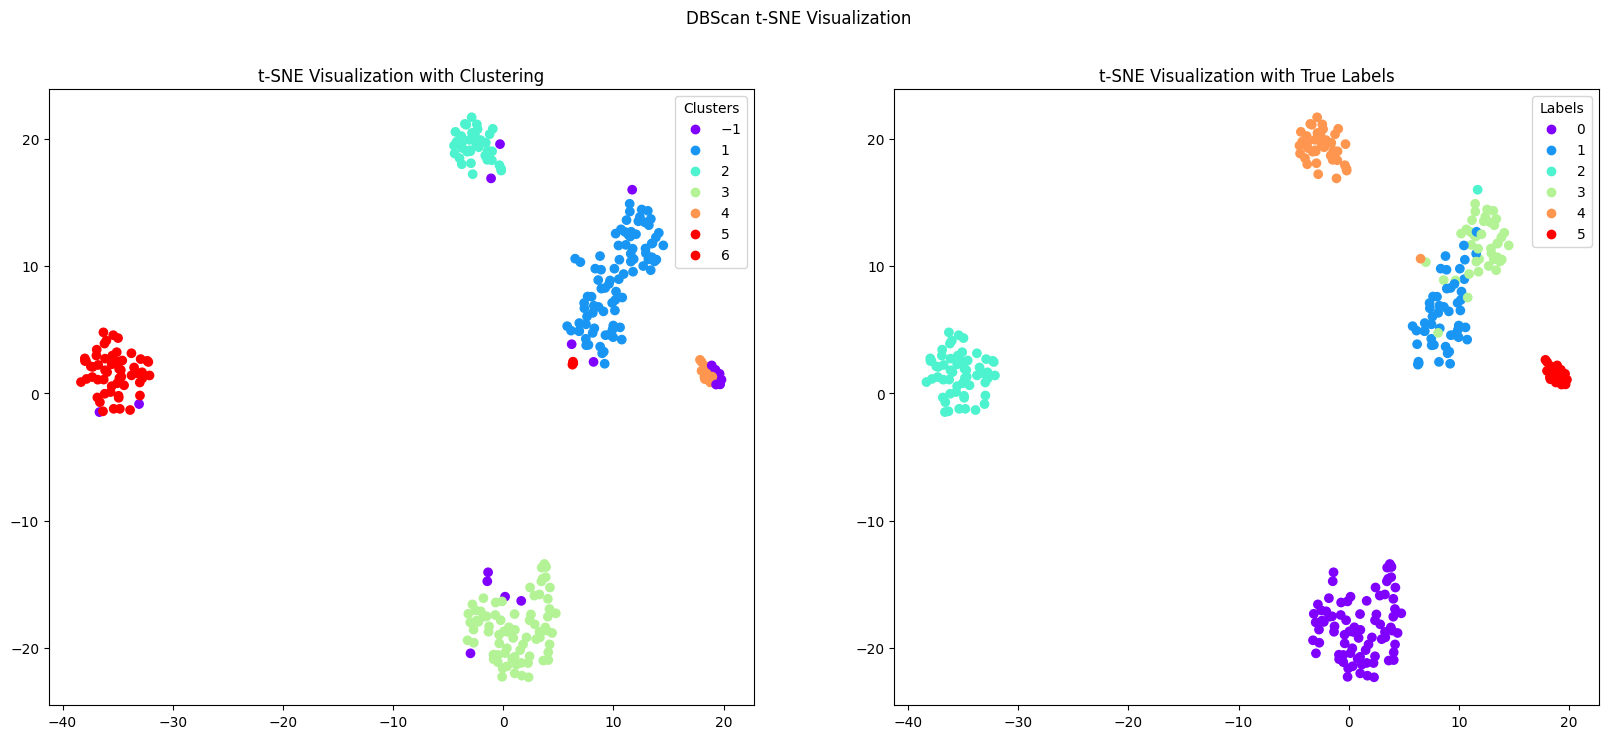

In [74]:
# DBScan Clustering

# Cluster X_train_pca using DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=3) #dummy values for eps and min_samples
Y_train_dbscan = dbscan.fit_predict(X_train_pca)

# DBscan Visualizations
#img_plt(X_train, Y_train_kmeans, 'K-Means Clustering (k=10)')
vec_vis(TSNE_X, Y_train_dbscan, numerical_labels, 6, 'DBScan t-SNE Visualization')